In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
warnings.filterwarnings("ignore")
print('Library imported!')

Library imported!


## 3.1 Personal Analysis

In [2]:
score = pd.read_csv("score.csv")
coeff = pd.read_csv("coeff.csv")
df_173 = pd.read_csv("173_clean.csv")

In [3]:
score.head()

infinity_id     score  bucket  score_date  \
0  007eb432-9f42-4a16-b130-59c684727d6f  0.010000       2  2019-03-28   
1  0133b901-f485-4ac7-86c6-eb3358246887  0.010276       2  2019-03-28   
2  01380744-ca55-4934-a17a-d2cca796d264  0.008912       3  2019-03-28   
3  0163a836-f996-49a1-bbce-68917a603107  0.009870       3  2019-03-28   
4  022af76b-06a9-41b5-bcc9-8b7dfb085dc4  0.018660       1  2019-03-28   

                             model  
0  spire_fashion_luxuryaccessories  
1  spire_fashion_luxuryaccessories  
2  spire_fashion_luxuryaccessories  
3  spire_fashion_luxuryaccessories  
4  spire_fashion_luxuryaccessories

In [4]:
df_173.head()

InfinityID  \
0  00000fa3-c23a-4f68-9f45-4ed4762546f7   
1  00004d7b-7dcf-4f46-b182-fbea50cdc944   
2  00005714-7c5d-4dbd-87c3-b8b8ed9f5210   
3  00006751-5292-43d2-8b24-e94c52a64cb3   
4  00006751-5292-43d2-8b24-e94c52a64cb3   

                                                UUID        Brand    Channel  \
0  jj8PvuxZra52k98JGtBgHtM62YxZYij1eZAQ6a85SEphZq...       brides   registry   
1  D3MzT5UmCJUcHHohAi3G7nkAOb8sPff4wIjGo3U5Y4H5uy...  vanity-fair  hollywood   
2               861f40d5-82e3-4e34-b935-ea839232e786        vogue     beauty   
3               44ee0aca-7af1-49fc-98af-d672eef7d76a       allure       skin   
4               f4514104-6715-4f4f-bc5b-04ed8826419f       allure       skin   

            Author Category      Location        Country  ScrollDepth  \
0              NaN      amp       La Mesa  United States          0.0   
1              NaN      amp         Tulsa  United States          0.0   
2  'jenna rennert'  general  Broken Arrow  United States          0.0   
3  'sarah kinonen'  general      Richmond  United States       1100.0   
4  'sarah kinonen'  general      Richmond  United States          0.0   

         Browser  ScrollDepth_count   Referer          Author1   gender  \
0  Mobile Safari                  0    google              NaN  unknown   
1  Mobile Safari                  0    google              NaN  unknown   
2       Facebook                  0  facebook  'jenna rennert'   female   
3  Mobile Safari                  1    google  'sarah kinonen'   female   
4  Mobile Safari                  0    google  'sarah kinonen'   female   

                                         clean_title  \
0        honeymoon registry sites brides should know   
1  crown queen elizabeth surprising downton abbey...   
2      best body lotions restore hydrate smooth skin   
3  earlobe reconstruction surgery repair stretche...   
4  earlobe reconstruction surgery repair stretche...   

                                       clean_keyword  \
0                                                NaN   
1                                                NaN   
2  lotion supercharged self care shea butter exfo...   
3         earlobe lobe sandra reconstruction surgery   
4         earlobe lobe sandra reconstruction surgery   

                                                text  
0       honeymoon registry sites brides should know   
1  crown queen elizabeth surprising downton abbey...  
2  best body lotions restore hydrate smooth skin ...  
3  earlobe reconstruction surgery repair stretche...  
4  earlobe reconstruction surgery repair stretche...

#### Select bucket1 from score dataset

In [5]:
bucket1=score[score['bucket']==1].infinity_id
bucket1_user=df_173.loc[df_173["InfinityID"].isin(bucket1)]

### 3.1.1 Persona analysis on bucket1
#### 1. brand

In [6]:
df_173.Brand.value_counts().sort_values(ascending=False).iloc[0:10]/df_173.Brand.count()

vogue                  0.125541
the-new-yorker         0.093097
allure                 0.085522
epicurious             0.072219
gq                     0.072022
bon-appetit            0.070094
conde-nast-traveler    0.069594
self                   0.061738
wired                  0.052126
vanity-fair            0.051743
Name: Brand, dtype: float64

In [7]:
bucket1_user.Brand.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user.Brand.count()

vogue                   0.277058
allure                  0.151633
gq                      0.081984
conde-nast-traveler     0.060579
bon-appetit             0.059973
architectural-digest    0.047221
epicurious              0.046521
glamour                 0.045467
self                    0.044184
the-new-yorker          0.038625
Name: Brand, dtype: float64

#### 2. channel

In [8]:
df_173.Channel.value_counts().sort_values(ascending=False).iloc[0:10]/df_173.Channel.count()

recipes          0.067695
homepage         0.065093
culture          0.062477
style            0.046437
beauty           0.044202
unkown           0.040439
magazine         0.039977
news             0.034659
fashion          0.033696
fashion-shows    0.026618
Name: Channel, dtype: float64

In [9]:
bucket1_user.Channel.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user.Channel.count()

fashion-shows    0.070535
beauty           0.069364
style            0.065762
fashion          0.058339
homepage         0.054680
culture          0.048246
skin             0.045647
recipes          0.044403
unkown           0.039402
living           0.034476
Name: Channel, dtype: float64

#### 3. country

In [10]:
df_173.Country.value_counts().sort_values(ascending=False).iloc[0:10]/df_173.Country.count()

United States     0.979815
Canada            0.004023
United Kingdom    0.002619
Mexico            0.000981
Puerto Rico       0.000923
Germany           0.000863
China             0.000596
Australia         0.000568
France            0.000551
Singapore         0.000464
Name: Country, dtype: float64

In [11]:
bucket1_user.Country.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user.Country.count()

United States     0.978178
Canada            0.003156
United Kingdom    0.002846
Poland            0.001798
Israel            0.001378
Puerto Rico       0.001365
Mexico            0.000946
France            0.000943
China             0.000745
Germany           0.000715
Name: Country, dtype: float64

#### 4. location

In [12]:
df_173[df_173.Country == 'United States'].Location.value_counts().sort_values(ascending=False).iloc[0:10]/df_173[df_173.Country == 'United States'].Location.count()

New York         0.057826
unknown          0.048383
Los Angeles      0.033292
Brooklyn         0.028463
Chicago          0.024517
San Francisco    0.015256
Washington       0.014974
Ashburn          0.014830
Houston          0.011837
Seattle          0.010869
Name: Location, dtype: float64

In [13]:
bucket1_user[bucket1_user.Country == 'United States'].Location.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user[bucket1_user.Country == 'United States'].Location.count()

New York         0.106578
Los Angeles      0.044443
Brooklyn         0.043304
unknown          0.034865
San Francisco    0.020008
Chicago          0.018813
Washington       0.016034
Miami            0.011671
Seattle          0.011129
Houston          0.009932
Name: Location, dtype: float64

#### 5. referer

In [14]:
df_173.Referer.value_counts().sort_values(ascending=False).iloc[0:10]/df_173.Referer.count()

google        0.316789
direct        0.301383
facebook      0.074379
vogue         0.041669
newyorker     0.018840
gq            0.016898
flipboard     0.016306
epicurious    0.014774
bonappetit    0.014462
t             0.013229
Name: Referer, dtype: float64

In [15]:
bucket1_user.Referer.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user.Referer.count()

direct         0.324147
google         0.240037
vogue          0.115080
facebook       0.070561
gq             0.032117
allure         0.024410
bonappetit     0.020273
flipboard      0.016694
android_app    0.014280
epicurious     0.011204
Name: Referer, dtype: float64

#### 6. browser

In [16]:
df_173.Browser.value_counts().sort_values(ascending=False).iloc[0:10]/df_173.Browser.count()

Mobile Safari                 0.304645
Chrome                        0.260428
Chrome Mobile                 0.112487
Facebook                      0.063298
Safari                        0.063036
Firefox                       0.033599
Chrome Mobile iOS             0.022510
Mobile Safari UI/WKWebView    0.018728
Edge                          0.017009
Instagram                     0.016201
Name: Browser, dtype: float64

In [17]:
bucket1_user.Browser.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user.Browser.count()

Chrome                        0.297738
Mobile Safari                 0.295380
Chrome Mobile                 0.117102
Safari                        0.086374
Facebook                      0.061488
Firefox                       0.022640
Chrome Mobile iOS             0.021674
Mobile Safari UI/WKWebView    0.016905
Flipboard                     0.016443
Edge                          0.012565
Name: Browser, dtype: float64

#### 7. Author1

In [18]:
df_173.Author1.value_counts().sort_values(ascending=False).iloc[0:10]/df_173.Author1.count()

'wired staff'               0.036172
'the epicurious editors'    0.026762
'cnt editors'               0.023292
'christian allaire'         0.015419
'caitlin morton'            0.014565
'the editors of\xa0gq'      0.012407
'megan gustashaw'           0.011984
'vanity fair magazine'      0.010764
'audrey bruno'              0.010698
'amy marturana'             0.009207
Name: Author1, dtype: float64

In [19]:
bucket1_user.Author1.value_counts().sort_values(ascending=False).iloc[0:10]/bucket1_user.Author1.count()

'christian allaire'         0.024457
'the epicurious editors'    0.020071
'the editors of\xa0gq'      0.019899
'cnt editors'               0.018996
'megan gustashaw'           0.018975
'nicole phelps'             0.018906
'jenna rennert'             0.018243
'sarah mower'               0.014365
'steff yotka'               0.014073
'lauren valenti'            0.013537
Name: Author1, dtype: float64

#### 8. Author Gender

In [20]:
df_173[df_173.gender != 'unknown'].gender.value_counts().sort_values(ascending=False)/df_173[df_173.gender != 'unknown'].gender.count()

female           0.563790
male             0.270461
mostly_female    0.109199
mostly_male      0.029502
andy             0.027048
Name: gender, dtype: float64

In [21]:
bucket1_user[bucket1_user.gender != 'unknown'].gender.value_counts().sort_values(ascending=False)/bucket1_user[bucket1_user.gender != 'unknown'].gender.count()

female           0.622013
male             0.213394
mostly_female    0.115008
mostly_male      0.030890
andy             0.018695
Name: gender, dtype: float64

### 3.1.2 Persona analysis for each model

In [22]:
accessory_id=score.groupby(['model',"bucket"]).get_group(("spire_fashion_luxuryaccessories",1))["infinity_id"]
luxurymale_id=score.groupby(['model',"bucket"]).get_group(("spire_fashion_luxurymale",1))["infinity_id"]
luxuryretail_id=score.groupby(['model',"bucket"]).get_group(("spire_fashion_luxuryretail",1))["infinity_id"]
luxuryhandbages_id = score.groupby(['model',"bucket"]).get_group(("spire_fashion_luxuryhandbags",1))["infinity_id"]
luxuryjewelry_id=score.groupby(['model',"bucket"]).get_group(("spire_fashion_luxuryjewelry",1))["infinity_id"]

In [23]:
accessory_user=df_173.loc[df_173["InfinityID"].isin(accessory_id)]
luxurymale_user=df_173.loc[df_173["InfinityID"].isin(luxurymale_id)]
luxuryretail_user=df_173.loc[df_173["InfinityID"].isin(luxuryretail_id)]
luxuryhandbages_user=df_173.loc[df_173["InfinityID"].isin(luxuryhandbages_id)]
luxuryjewelry_user=df_173.loc[df_173["InfinityID"].isin(luxuryjewelry_id)]

In [24]:
list_accessory= list(set(list(accessory_id)))
list_male=list(set(list(luxurymale_id)))
list_retai=list(set(list(luxuryretail_id)))
list_handbag=list(set(list(luxuryhandbages_id)))
list_jew=list(set(list(luxuryjewelry_id)))

In [25]:
id_bucket1 = list_accessory+list_male+ list_retai+ list_handbag+ list_jew
result = pd.value_counts(id_bucket1)
print(result)

b7c53fb4-d3fb-4fa9-bbbd-83f2cd3b087f    5
86349a42-2cd0-49bc-a9ca-75712d78db9d    5
3e8b00bd-72dc-453c-81b5-0356075154b0    5
8d1e5430-6da6-428b-b0f3-2e5fba95c1c2    5
ee8039cc-9b8a-4e69-97a5-b5854d34e4dc    5
8802720a-2992-42c4-b355-c68fc7fc360a    5
ccfaed30-b016-41b1-aecb-9b01af03ef86    5
b5f84af7-94e9-44fc-ae26-6f9ca5163de7    5
917b8215-6884-4fc8-9200-8e17ab930172    5
a47d0d95-aeb4-473f-94b4-fd10f033adb5    5
041bdbf9-3889-45d4-8fc0-f8978ccfb4c4    5
88ea65dc-55c4-4ca0-bf5c-1c2f78d9cc9a    5
983eba23-aa37-460c-89e8-9fb5ed1e8ff9    5
8de50265-370a-41ec-8fa2-04b9a0008f68    5
bdd7da7b-50a1-4d79-bbe5-e4088bacb8f5    5
18198fbd-778b-4d10-af44-41ca008d4828    5
7cab2275-9f04-4d1f-b7cf-29d71841bc32    5
6c1755cd-bd9f-4e6b-9b87-ef4b284af1fe    5
7e1facc4-903c-4639-959c-03fd2543e37c    5
0708e727-904a-4570-b752-4a31afbe3192    5
bb8ed035-a31e-42e7-9833-0552dc36727e    5
0ade5594-5770-4b6e-8f6f-6abae78f3f9c    5
63f607f8-27f4-4e2a-a8fb-2b009ed1afba    5
350a3a03-0504-438d-9a3e-0edca93fc8

In [26]:
df_result= result.to_frame()
df_result= df_result.rename(columns={0:'number'})
df_result.number.value_counts()/len(df_result)

1    0.900606
2    0.089984
3    0.008775
4    0.000613
5    0.000023
Name: number, dtype: float64

#### Conclusion:
Arond 90% of bucket 1 customers are bucket 1 customers of only 1 model, and 9% are of 2 models.
#### write function

In [27]:
# suitable for col name: Brand, Channel, Country, Referer, Browser, Author1
def composition(df,col):
    print(col, 'composition')
    print(df[col].value_counts().sort_values(ascending=False).iloc[0:10]/df[col].count())

In [28]:
# suitable for col name: Location
def location(df):
    print(df[df.Country == 'United States'].Location.value_counts().sort_values(ascending=False).iloc[0:10]/df[df.Country == 'United States'].Location.count())

In [29]:
# suitable for col name: gender
def gender(df):
    print(df[df.gender != 'unknown'].gender.value_counts().sort_values(ascending=False)/df[df.gender != 'unknown'].gender.count())

#### 1. brand

In [30]:
list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]

In [31]:
for i in list:
    print('------------')
    composition(i,'Brand')

------------
Brand composition
vogue                   0.274950
allure                  0.146719
gq                      0.116400
bon-appetit             0.065694
glamour                 0.052577
self                    0.047247
architectural-digest    0.044030
conde-nast-traveler     0.042342
vanity-fair             0.031306
epicurious              0.029994
Name: Brand, dtype: float64
------------
Brand composition
vogue                   0.319952
gq                      0.143822
allure                  0.119408
the-new-yorker          0.058499
bon-appetit             0.041085
conde-nast-traveler     0.039387
architectural-digest    0.038873
vanity-fair             0.035981
glamour                 0.032821
self                    0.030000
Name: Brand, dtype: float64
------------
Brand composition
vogue                   0.251913
allure                  0.131000
conde-nast-traveler     0.118264
bon-appetit             0.085182
epicurious              0.070204
architectural-digest    0.

#### 2. channel

In [32]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    composition(i,'Channel')

------------
Channel composition
style            0.096039
beauty           0.080875
fashion-shows    0.065452
fashion          0.063656
homepage         0.058659
culture          0.044982
skin             0.044941
recipes          0.042184
unkown           0.039243
living           0.030336
Name: Channel, dtype: float64
------------
Channel composition
style            0.098368
homepage         0.084999
fashion-shows    0.078828
beauty           0.063121
culture          0.057393
fashion          0.056800
living           0.050859
unkown           0.039165
skin             0.035634
vogueworld       0.030956
Name: Channel, dtype: float64
------------
Channel composition
beauty           0.069767
recipes          0.063394
fashion          0.051531
homepage         0.047208
culture          0.044793
style            0.042743
fashion-shows    0.041465
the bests        0.039607
skin             0.038349
unkown           0.038106
Name: Channel, dtype: float64
------------
Channel compositio

#### 3. country

In [33]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    composition(i,'Country')

------------
Country composition
United States     0.964860
Poland            0.005723
Canada            0.005330
Puerto Rico       0.003960
United Kingdom    0.002715
Germany           0.002231
Mexico            0.002072
France            0.001763
China             0.001554
Singapore         0.001069
Name: Country, dtype: float64
------------
Country composition
United States     0.974472
Poland            0.005262
Israel            0.004543
United Kingdom    0.004022
Canada            0.002252
Mexico            0.001651
France            0.001059
China             0.000790
Puerto Rico       0.000632
Singapore         0.000474
Name: Country, dtype: float64
------------
Country composition
United States     0.980232
Canada            0.003734
United Kingdom    0.003714
Sweden            0.001786
China             0.001248
Singapore         0.000923
Denmark           0.000883
Mexico            0.000761
Colombia          0.000649
Australia         0.000629
Name: Country, dtype: float64
-

#### 4. location

In [34]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    location(i)

------------
New York         0.104905
Los Angeles      0.044776
Brooklyn         0.033043
unknown          0.032827
San Francisco    0.020721
Newark           0.017015
Washington       0.016530
Miami            0.015431
Chicago          0.013681
Columbus         0.013456
Name: Location, dtype: float64
------------
New York         0.111663
Brooklyn         0.058248
Los Angeles      0.046321
unknown          0.031751
Chicago          0.023862
Washington       0.018016
San Francisco    0.016808
San Jose         0.014416
Columbus         0.013540
Seattle          0.012543
Name: Location, dtype: float64
------------
New York         0.121146
Los Angeles      0.047819
unknown          0.044216
Brooklyn         0.042808
San Francisco    0.034661
Chicago          0.023407
Washington       0.019225
Oakland          0.018200
San Diego        0.012641
Philadelphia     0.012216
Name: Location, dtype: float64
------------
New York         0.133039
Brooklyn         0.054504
Los Angeles      0.0460

#### 5. referer

In [35]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    composition(i,'Referer')

------------
Referer composition
direct         0.352274
google         0.217012
vogue          0.096403
facebook       0.059714
gq             0.050581
bonappetit     0.030196
allure         0.024516
flipboard      0.016648
android_app    0.014830
smartnews      0.012333
Name: Referer, dtype: float64
------------
Referer composition
direct         0.315981
google         0.205649
vogue          0.150983
facebook       0.071163
gq             0.056196
allure         0.020143
flipboard      0.016750
newyorker      0.015815
android_app    0.013873
bonappetit     0.012763
Name: Referer, dtype: float64
------------
Referer composition
direct                 0.367266
google                 0.239109
vogue                  0.086180
facebook               0.076800
bonappetit             0.026889
allure                 0.021802
gq                     0.018485
epicurious             0.016949
flipboard              0.014619
architecturaldigest    0.013256
Name: Referer, dtype: float64
-----------

#### 6. browser

In [36]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    composition(i,'Browser')

------------
Browser composition
Mobile Safari                 0.312831
Chrome                        0.303197
Chrome Mobile                 0.115807
Safari                        0.076263
Facebook                      0.053738
Chrome Mobile iOS             0.019091
Mobile Safari UI/WKWebView    0.018264
Firefox                       0.017086
Flipboard                     0.016701
Samsung Internet              0.013986
Name: Browser, dtype: float64
------------
Browser composition
Chrome                        0.297497
Mobile Safari                 0.278029
Chrome Mobile                 0.114272
Safari                        0.105115
Facebook                      0.064006
Firefox                       0.024659
Chrome Mobile iOS             0.023229
Mobile Safari UI/WKWebView    0.016655
Flipboard                     0.016134
Edge                          0.014893
Name: Browser, dtype: float64
------------
Browser composition
Chrome                        0.331118
Mobile Safari         

#### 7. Author1

In [37]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    composition(i,'Author1')

------------
Author1 composition
'megan gustashaw'         0.030914
'christian allaire'       0.030762
'the editors of\xa0gq'    0.028664
'jenna rennert'           0.020525
'nicole phelps'           0.018402
'yang-yi goh'             0.017454
'lauren valenti'          0.015229
'steff yotka'             0.014913
'brooke bobb'             0.013283
'sarah mower'             0.012980
Name: Author1, dtype: float64
------------
Author1 composition
'the editors of\xa0gq'    0.036520
'megan gustashaw'         0.032354
'nicole phelps'           0.024946
'christian allaire'       0.024739
'jenna rennert'           0.019274
'sarah mower'             0.018655
'yang-yi goh'             0.017039
'emily farra'             0.016918
'lauren valenti'          0.015424
'steff yotka'             0.015169
Name: Author1, dtype: float64
------------
Author1 composition
'cnt editors'               0.033266
'the epicurious editors'    0.029970
'caitlin morton'            0.022515
'jenna rennert'             0.

#### 8. gender

In [38]:
# list= [accessory_user, luxurymale_user, luxuryretail_user, luxuryhandbages_user, luxuryjewelry_user]
for i in list:
    print('------------')
    gender(i)

------------
female           0.626806
male             0.209922
mostly_female    0.112470
mostly_male      0.031323
andy             0.019479
Name: gender, dtype: float64
------------
female           0.581933
male             0.248623
mostly_female    0.121330
mostly_male      0.032768
andy             0.015347
Name: gender, dtype: float64
------------
female           0.621861
male             0.198030
mostly_female    0.128075
mostly_male      0.031637
andy             0.020396
Name: gender, dtype: float64
------------
female           0.632787
male             0.223078
mostly_female    0.100804
mostly_male      0.029440
andy             0.013891
Name: gender, dtype: float64
------------
female           0.669749
male             0.153332
mostly_female    0.126256
mostly_male      0.031689
andy             0.018974
Name: gender, dtype: float64


## 3.2 Topic Modeling

In [3]:
joined = pd.merge(df_173, score, how= 'inner', left_on='InfinityID', right_on = 'infinity_id')
joined.head()

InfinityID                                  UUID  \
0  00005714-7c5d-4dbd-87c3-b8b8ed9f5210  861f40d5-82e3-4e34-b935-ea839232e786   
1  00006751-5292-43d2-8b24-e94c52a64cb3  44ee0aca-7af1-49fc-98af-d672eef7d76a   
2  00006751-5292-43d2-8b24-e94c52a64cb3  f4514104-6715-4f4f-bc5b-04ed8826419f   
3  0000738d-2b37-4f97-a301-b5f77609c04d  43cb9c2d-2c60-4938-9492-2f6ee125197c   
4  0000b43d-c084-4f91-8b2b-b0d87f31d841  11aa3184-82e9-4366-9938-3dcbee755b52   

         Brand        Channel           Author Category       Location  \
0        vogue         beauty  'jenna rennert'  general   Broken Arrow   
1       allure           skin  'sarah kinonen'  general       Richmond   
2       allure           skin  'sarah kinonen'  general       Richmond   
3  vanity-fair           news      'joe hagan'  general     Parsippany   
4        vogue  fashion-shows              NaN  general  San Francisco   

         Country  ScrollDepth        Browser  ...          Author1   gender  \
0  United States          0.0       Facebook  ...  'jenna rennert'   female   
1  United States       1100.0  Mobile Safari  ...  'sarah kinonen'   female   
2  United States          0.0  Mobile Safari  ...  'sarah kinonen'   female   
3  United States          0.0             IE  ...      'joe hagan'     male   
4  United States          0.0         Chrome  ...              NaN  unknown   

                                         clean_title  \
0      best body lotions restore hydrate smooth skin   
1  earlobe reconstruction surgery repair stretche...   
2  earlobe reconstruction surgery repair stretche...   
3  beto rourke comes grips with presidential just...   
4  fashion shows fashion week runway designer col...   

                                       clean_keyword  \
0  lotion supercharged self care shea butter exfo...   
1         earlobe lobe sandra reconstruction surgery   
2         earlobe lobe sandra reconstruction surgery   
3                                                NaN   
4                              cond nast minute york   

                                                text  \
0  best body lotions restore hydrate smooth skin ...   
1  earlobe reconstruction surgery repair stretche...   
2  earlobe reconstruction surgery repair stretche...   
3  beto rourke comes grips with presidential just...   
4  fashion shows fashion week runway designer col...   

                            infinity_id     score bucket  score_date  \
0  00005714-7c5d-4dbd-87c3-b8b8ed9f5210  0.008684      3  2019-02-18   
1  00006751-5292-43d2-8b24-e94c52a64cb3  0.014536      1  2019-01-22   
2  00006751-5292-43d2-8b24-e94c52a64cb3  0.014536      1  2019-01-22   
3  0000738d-2b37-4f97-a301-b5f77609c04d  0.005810      3  2019-03-15   
4  0000b43d-c084-4f91-8b2b-b0d87f31d841  0.046849      1  2019-02-21   

                             model  
0  spire_fashion_luxuryaccessories  
1      spire_fashion_luxuryjewelry  
2      spire_fashion_luxuryjewelry  
3     spire_fashion_luxuryhandbags  
4       spire_fashion_luxuryretail  

[5 rows x 22 columns]

In [4]:
joined.to_csv('173_score_joined.csv',index=False)

In [5]:
data = pd.read_csv('173_score_joined.csv')

In [6]:
print(data.shape)

(1070656, 22)


In [7]:
data.isnull().sum()

InfinityID                0
UUID                     61
Brand                     0
Channel                   0
Author               382793
Category                  0
Location                  0
Country                   0
ScrollDepth               0
Browser                   0
ScrollDepth_count         0
Referer                4548
Author1              382793
gender                    0
clean_title           88024
clean_keyword        194304
text                      0
infinity_id               0
score                     0
bucket                    0
score_date                0
model                     0
dtype: int64

In [8]:
data.head()

InfinityID                                  UUID  \
0  00005714-7c5d-4dbd-87c3-b8b8ed9f5210  861f40d5-82e3-4e34-b935-ea839232e786   
1  00006751-5292-43d2-8b24-e94c52a64cb3  44ee0aca-7af1-49fc-98af-d672eef7d76a   
2  00006751-5292-43d2-8b24-e94c52a64cb3  f4514104-6715-4f4f-bc5b-04ed8826419f   
3  0000738d-2b37-4f97-a301-b5f77609c04d  43cb9c2d-2c60-4938-9492-2f6ee125197c   
4  0000b43d-c084-4f91-8b2b-b0d87f31d841  11aa3184-82e9-4366-9938-3dcbee755b52   

         Brand        Channel           Author Category       Location  \
0        vogue         beauty  'jenna rennert'  general   Broken Arrow   
1       allure           skin  'sarah kinonen'  general       Richmond   
2       allure           skin  'sarah kinonen'  general       Richmond   
3  vanity-fair           news      'joe hagan'  general     Parsippany   
4        vogue  fashion-shows              NaN  general  San Francisco   

         Country  ScrollDepth        Browser  ...          Author1   gender  \
0  United States          0.0       Facebook  ...  'jenna rennert'   female   
1  United States       1100.0  Mobile Safari  ...  'sarah kinonen'   female   
2  United States          0.0  Mobile Safari  ...  'sarah kinonen'   female   
3  United States          0.0             IE  ...      'joe hagan'     male   
4  United States          0.0         Chrome  ...              NaN  unknown   

                                         clean_title  \
0      best body lotions restore hydrate smooth skin   
1  earlobe reconstruction surgery repair stretche...   
2  earlobe reconstruction surgery repair stretche...   
3  beto rourke comes grips with presidential just...   
4  fashion shows fashion week runway designer col...   

                                       clean_keyword  \
0  lotion supercharged self care shea butter exfo...   
1         earlobe lobe sandra reconstruction surgery   
2         earlobe lobe sandra reconstruction surgery   
3                                                NaN   
4                              cond nast minute york   

                                                text  \
0  best body lotions restore hydrate smooth skin ...   
1  earlobe reconstruction surgery repair stretche...   
2  earlobe reconstruction surgery repair stretche...   
3  beto rourke comes grips with presidential just...   
4  fashion shows fashion week runway designer col...   

                            infinity_id     score bucket  score_date  \
0  00005714-7c5d-4dbd-87c3-b8b8ed9f5210  0.008684      3  2019-02-18   
1  00006751-5292-43d2-8b24-e94c52a64cb3  0.014536      1  2019-01-22   
2  00006751-5292-43d2-8b24-e94c52a64cb3  0.014536      1  2019-01-22   
3  0000738d-2b37-4f97-a301-b5f77609c04d  0.005810      3  2019-03-15   
4  0000b43d-c084-4f91-8b2b-b0d87f31d841  0.046849      1  2019-02-21   

                             model  
0  spire_fashion_luxuryaccessories  
1      spire_fashion_luxuryjewelry  
2      spire_fashion_luxuryjewelry  
3     spire_fashion_luxuryhandbags  
4       spire_fashion_luxuryretail  

[5 rows x 22 columns]

In [7]:
data['text'].count()

1070656

In [8]:
data['text'].nunique()

119524

In [9]:
data['text'].value_counts()[:10]

vogue fashion beauty celebrity fashion shows vogue cond nast celebrity                                                                       16334
                                                                                                                                              9949
best menswear items this week freshest menswear disposable income                                                                             4470
search                                                                                                                                        3333
inside vanity fair oscar party vanity fair oscar party burger academy award radhika jones wallis annenberg center beverly hills city hall     3221
fashion shows fashion week runway designer collections cond nast minute york                                                                  2671
phil best street style photos from paris fashion week fall paris phil chanel                                          

In [10]:
sample = data.sample(50000)

In [11]:
#Apply TFIDF Vecterizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', min_df=20, max_df=0.9)
X_tfidf = tfidf_vect.fit_transform(sample['text']) # fit vectors of unique word counts in stemmed words
#print('TFIDF matrix dimensions:',X_tfidf.shape)
#print(tfidf_vect.get_feature_names())

In [12]:
# Latent Dirichlet Allocation(LDA)

from sklearn.decomposition import LatentDirichletAllocation as LDA

k_topics = 7
lda = LDA(n_components=k_topics, max_iter=10, learning_method='online', random_state=123)
lda.fit(X_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=123, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [13]:
tfidf_features = tfidf_vect.get_feature_names()
top_n_words = 12
word_dict = dict()

for i in range(0,k_topics):
    topic = pd.DataFrame(data={'word':tfidf_features, 'weight':lda.components_[i]})
    sorted_topic = topic.sort_values('weight', ascending=False).head(top_n_words)
    word_dict[i+1] = list(sorted_topic['word'])

df_topic = pd.DataFrame(word_dict)
df_topic = df_topic.T
df_topic

0           1           2        3         4       5           6   \
1      wear       ready  collection     fall    oscars  spring      carpet   
2      wire       right        cond     nast   netflix   peter  vegetarian   
3   recipes  epicurious      recipe  chicken  technica   pasta      dinner   
4    beauty       vogue   celebrity  fashion      skin    best        hair   
5   wedding       style       paris     week      golf    best      street   
6  menswear        best       award   awards      fair  vanity      reader   
7    search      yorker       music     best      york  things        city   

       7        8              9        10        11  
1    lady     gaga         jenner     acne   couture  
2   guide  twitter           best  protein     james  
3    soup     make  architectural    sauce     hotel  
4  allure     care          trump    shows   product  
5    phil   photos        fashion    dress      fall  
6   world    party           week   choice  traveler  
7    need     know          voice  trusted      kate

In [14]:
df_topic.columns = ['Word '+str(i) for i in range(df_topic.shape[1])]
df_topic.index = ['Topic'+str(i) for i in range(df_topic.shape[0])]
df_topic

Word 0      Word 1      Word 2   Word 3    Word 4  Word 5  \
Topic0      wear       ready  collection     fall    oscars  spring   
Topic1      wire       right        cond     nast   netflix   peter   
Topic2   recipes  epicurious      recipe  chicken  technica   pasta   
Topic3    beauty       vogue   celebrity  fashion      skin    best   
Topic4   wedding       style       paris     week      golf    best   
Topic5  menswear        best       award   awards      fair  vanity   
Topic6    search      yorker       music     best      york  things   

            Word 6  Word 7   Word 8         Word 9  Word 10   Word 11  
Topic0      carpet    lady     gaga         jenner     acne   couture  
Topic1  vegetarian   guide  twitter           best  protein     james  
Topic2      dinner    soup     make  architectural    sauce     hotel  
Topic3        hair  allure     care          trump    shows   product  
Topic4      street    phil   photos        fashion    dress      fall  
Topic5      reader   world    party           week   choice  traveler  
Topic6        city    need     know          voice  trusted      kate

In [77]:
Topics = ["fashion","social/life","cooking","beauty/personal care","events/styles", 
          "awards/party", "cities/places"]
df_topic["Topics"] = Topics
df_topic

Word 0      Word 1      Word 2   Word 3    Word 4  Word 5  \
Topic0      wear       ready  collection     fall    oscars  spring   
Topic1      wire       right        cond     nast   netflix   peter   
Topic2   recipes  epicurious      recipe  chicken  technica   pasta   
Topic3    beauty       vogue   celebrity  fashion      skin    best   
Topic4   wedding       style       paris     week      golf    best   
Topic5  menswear        best       award   awards      fair  vanity   
Topic6    search      yorker       music     best      york  things   

            Word 6  Word 7   Word 8         Word 9  Word 10   Word 11  \
Topic0      carpet    lady     gaga         jenner     acne   couture   
Topic1  vegetarian   guide  twitter           best  protein     james   
Topic2      dinner    soup     make  architectural    sauce     hotel   
Topic3        hair  allure     care          trump    shows   product   
Topic4      street    phil   photos        fashion    dress      fall   
Topic5      reader   world    party           week   choice  traveler   
Topic6        city    need     know          voice  trusted      kate   

                      Topics  
Topic0               fashion  
Topic1           social/life  
Topic2               cooking  
Topic3  beauty/personal care  
Topic4          events/style  
Topic5          awards/party  
Topic6         cities/places

In [78]:
lda_output = lda.transform(X_tfidf)

In [79]:
# column names
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# index names
userid = [sample.iloc[i,0] for i in range(len(sample))]

In [80]:
# Make the pandas dataframe
df_user_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=userid)
# Get dominant topic for each document
dominant_topic = np.argmax(df_user_topic.values, axis=1)
df_user_topic['dominant_topic'] = dominant_topic

In [81]:
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_user_topic_sample = df_user_topic.reset_index(drop=True).head(15).style.applymap(color_green).applymap(make_bold)
df_user_topic_sample

In [82]:
df_user_topic['dominant_topic'].value_counts()

3    10735
2     7849
4     7230
0     6710
6     6149
5     5903
1     5424
Name: dominant_topic, dtype: int64

In [83]:
df_user_topic = df_user_topic.reset_index()
df_user_topic = df_user_topic.rename(columns={'index':'InfinityID'})
df_user_topic.head()

InfinityID  Topic0  Topic1  Topic2  Topic3  \
0  2dd18635-cd18-449a-bb15-9eaae3abddf9    0.05    0.05    0.32    0.05   
1  e34ac9db-3274-4c0c-a80c-225b2900ec45    0.02    0.02    0.02    0.02   
2  3e096940-6c8b-413d-9bec-9addfc70a271    0.04    0.77    0.04    0.04   
3  274ec9c2-ea3c-4ff0-a9ec-baac2ce703e5    0.05    0.05    0.05    0.69   
4  f71c8236-e831-4bb8-b67a-6c6a4e077f88    0.59    0.04    0.12    0.14   

   Topic4  Topic5  Topic6  dominant_topic  
0    0.04    0.04    0.46               6  
1    0.02    0.02    0.85               6  
2    0.04    0.04    0.04               1  
3    0.05    0.05    0.05               3  
4    0.04    0.04    0.04               0

In [133]:
topic_dic ={0: "Topic0:fashion", 1: "Topic1:social/life",2: "Topic2:cooking", 3:"Topic3:beauty/personal care", 4:"Topic4:events/styles",
           5:"Topic5:awards/parties",6:"Topic6:cities/places"} 

df_user_topic['topic name'] = df_user_topic['dominant_topic'].map(topic_dic)
df_user_topic.head()

InfinityID  Topic0  Topic1  Topic2  Topic3  \
0  2dd18635-cd18-449a-bb15-9eaae3abddf9    0.05    0.05    0.32    0.05   
1  e34ac9db-3274-4c0c-a80c-225b2900ec45    0.02    0.02    0.02    0.02   
2  3e096940-6c8b-413d-9bec-9addfc70a271    0.04    0.77    0.04    0.04   
3  274ec9c2-ea3c-4ff0-a9ec-baac2ce703e5    0.05    0.05    0.05    0.69   
4  f71c8236-e831-4bb8-b67a-6c6a4e077f88    0.59    0.04    0.12    0.14   

   Topic4  Topic5  Topic6  dominant_topic                   topic name  
0    0.04    0.04    0.46               6         Topic6:cities/places  
1    0.02    0.02    0.85               6         Topic6:cities/places  
2    0.04    0.04    0.04               1           Topic1:social/life  
3    0.05    0.05    0.05               3  Topic3:beauty/personal care  
4    0.04    0.04    0.04               0               Topic0:fashion

In [ ]:
df_new = pd.merge(sample, df_user_topic,on='InfinityID')

In [135]:
topic_dist = pd.DataFrame(df_new.groupby(['Brand','topic name']).size().reset_index())
topic_dist.rename(columns={0:"count"}, inplace=True)

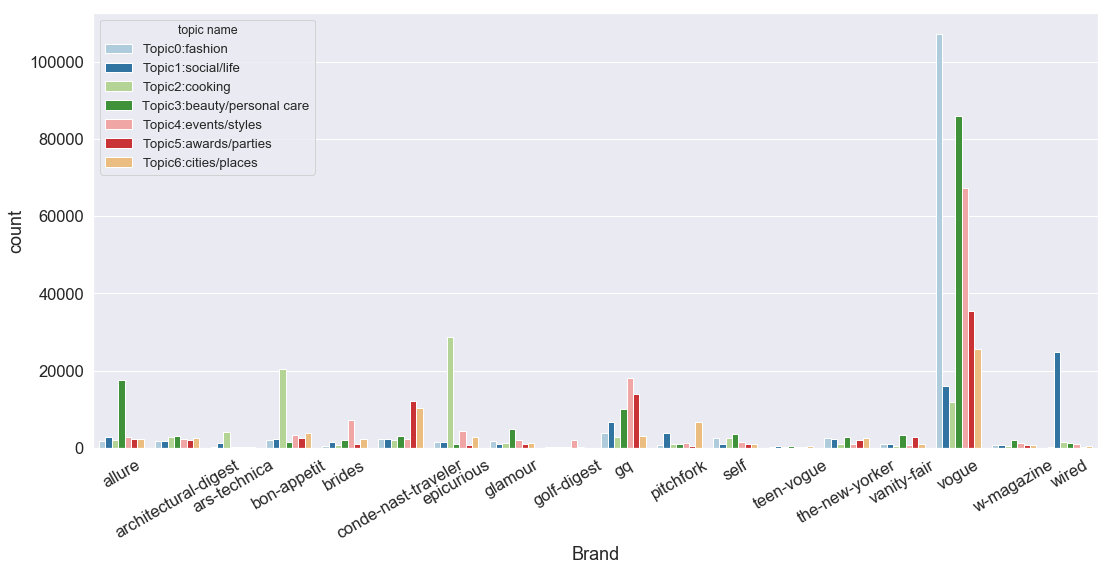

In [146]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=30)
sns.set(font_scale=1.2)
sns_plot = sns.barplot(x="Brand", y="count", hue="topic name", data=topic_dist, palette = sns.color_palette("Paired"))
pic = sns_plot.get_figure()
pic.savefig('topicDistribution_brand.png')

In [137]:
topic_dist1 = pd.DataFrame(df_new.groupby(['model','topic name']).size().reset_index())
topic_dist1.rename(columns={0:"count"}, inplace=True)

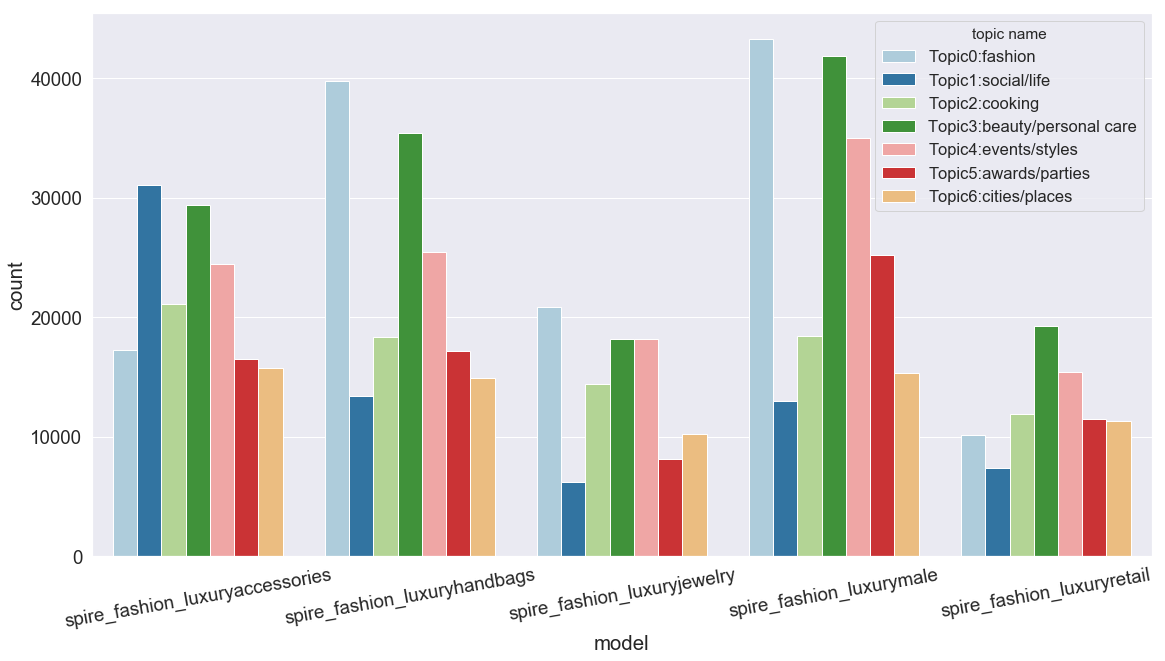

In [145]:
plt.figure(figsize=(19, 10))
plt.xticks(rotation=10)
sns.set(font_scale=1.5)
sns_plot = sns.barplot(x="model", y="count", hue="topic name", data=topic_dist1, palette = sns.color_palette("Paired"))
pic = sns_plot.get_figure()
pic.savefig('topicDistribution_model.png')

In [141]:
topic_dist2 = pd.DataFrame(df_new.groupby(['bucket','topic name']).size().reset_index())
topic_dist2.rename(columns={0:"count"}, inplace=True)

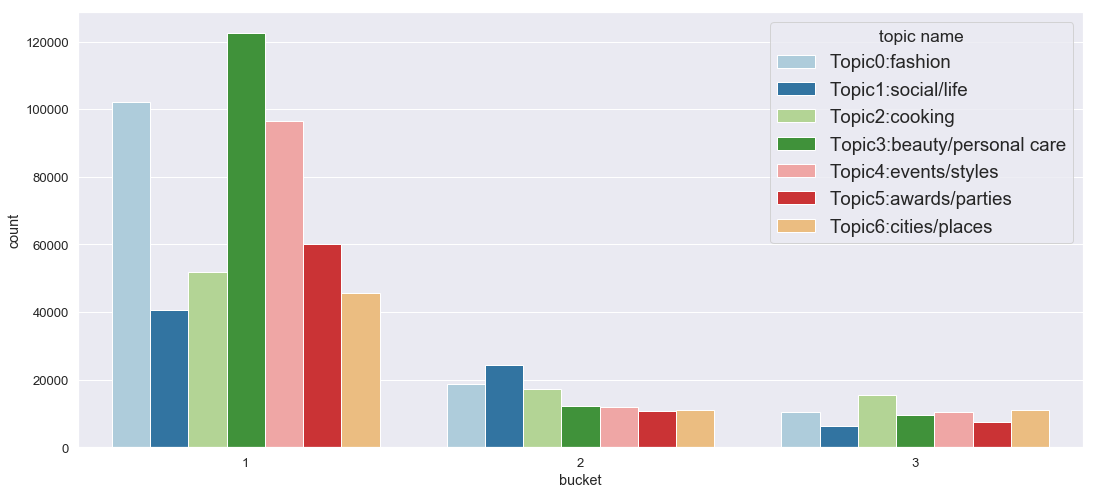

In [147]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=0)
sns.set(font_scale=1.7)
sns_plot = sns.barplot(x="bucket", y="count", hue="topic name", data=topic_dist2, palette = sns.color_palette("Paired"))
pic = sns_plot.get_figure()
pic.savefig('topicDistribution_bucket.png')

## 3.3 WordCloud 

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
print("WorldCloud Library Imported!")

WorldCloud Library Imported!


In [56]:
model_jewelry = data.loc[data['model']=='spire_fashion_luxuryjewelry']
model_accensories = data.loc[data['model']=='spire_fashion_luxuryaccessories']
model_handbags = data.loc[data['model']=='spire_fashion_luxuryhandbags']
model_retail = data.loc[data['model']=='spire_fashion_luxuryretail']
model_male = data.loc[data['model']=='spire_fashion_luxurymale']

In [57]:
model_jewelry.bucket.value_counts()

1    91872
2    50502
3    42699
Name: bucket, dtype: int64

In [58]:
model_accensories.bucket.value_counts()

1    129784
2     52828
3     42177
Name: bucket, dtype: int64

In [59]:
model_handbags.bucket.value_counts()

1    125680
2     53959
3     50252
Name: bucket, dtype: int64

In [60]:
model_retail.bucket.value_counts()

1    104182
2     46855
3     43774
Name: bucket, dtype: int64

In [61]:
model_male.bucket.value_counts()

1    137714
2     52489
3     45889
Name: bucket, dtype: int64

### 3.3.1 luxury retail 
#### word cloud

[('best', 40502), ('fashion', 16147), ('beauty', 15812), ('skin', 10512), ('carpet', 10162), ('hair', 9737), ('recipes', 9414), ('wedding', 8661), ('allure', 8405), ('celebrity', 7881), ('fall', 7518), ('product', 7286), ('world', 7282), ('wear', 7174), ('collection', 7068), ('award', 7056), ('city', 7040), ('paris', 6970), ('spring', 6792), ('ready', 6693)]


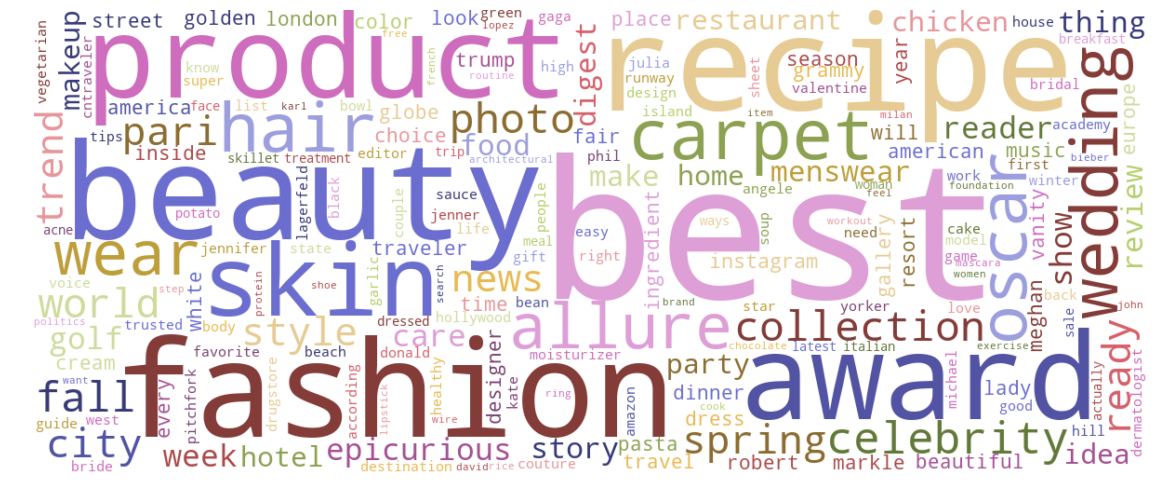

In [62]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_retail["text"].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury retail.png')
#plt.savefig('luxury retail.png')

#### bucket 1 word cloud

[('best', 23594), ('beauty', 12101), ('fashion', 11437), ('skin', 7048), ('celebrity', 6319), ('wedding', 6133), ('hair', 6129), ('carpet', 5715), ('allure', 5635), ('product', 5356), ('fall', 4940), ('recipes', 4895), ('collection', 4585), ('wear', 4567), ('paris', 4334), ('ready', 4265), ('style', 4046), ('care', 4009), ('spring', 4006), ('city', 3890)]


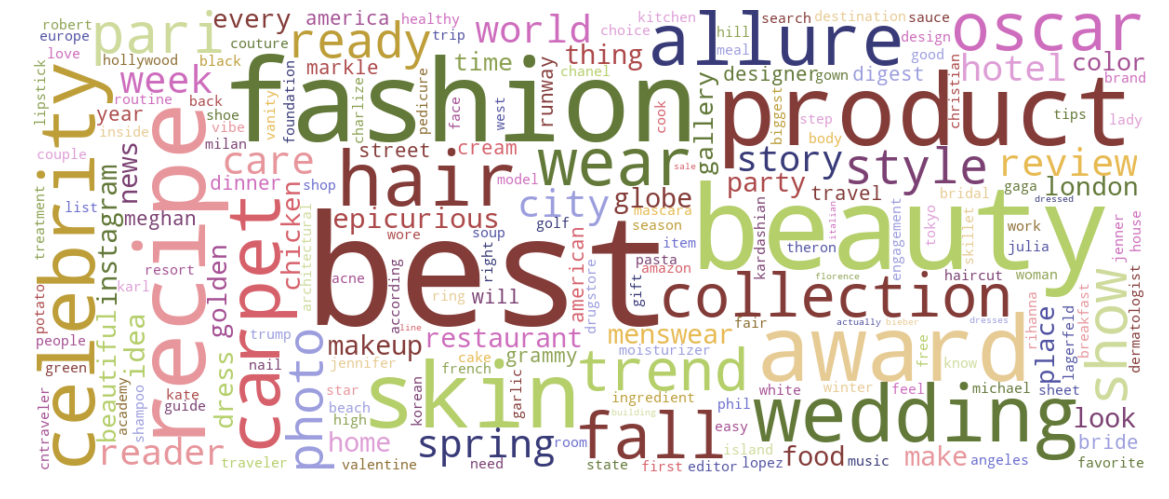

In [63]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_retail.loc[model_retail.bucket == 1]['text'].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury retail bucket 1.png')

### 3.3.2 luxury male
#### word cloud

[('best', 43978), ('fashion', 25862), ('beauty', 17174), ('wear', 15462), ('ready', 14288), ('fall', 13798), ('celebrity', 13375), ('collection', 12604), ('news', 11644), ('trump', 11554), ('skin', 11330), ('carpet', 11286), ('style', 10457), ('hair', 10425), ('week', 10113), ('menswear', 9856), ('allure', 9389), ('paris', 8867), ('spring', 8032), ('shows', 7798)]


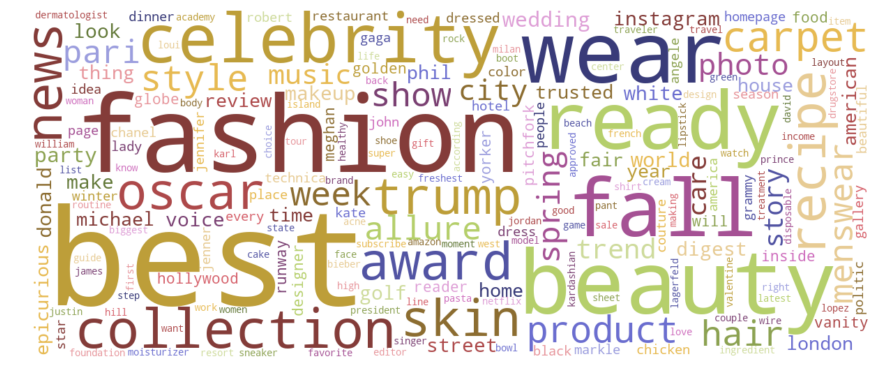

In [64]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_male["text"].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury male.png')

#### bucket 1 word cloud

[('best', 29460), ('fashion', 22440), ('beauty', 13936), ('wear', 13310), ('ready', 12321), ('fall', 12284), ('celebrity', 11699), ('collection', 10770), ('menswear', 9230), ('style', 9071), ('week', 8958), ('carpet', 8681), ('skin', 8088), ('paris', 6895), ('shows', 6769), ('hair', 6693), ('news', 6616), ('allure', 6553), ('spring', 6484), ('trump', 5288)]


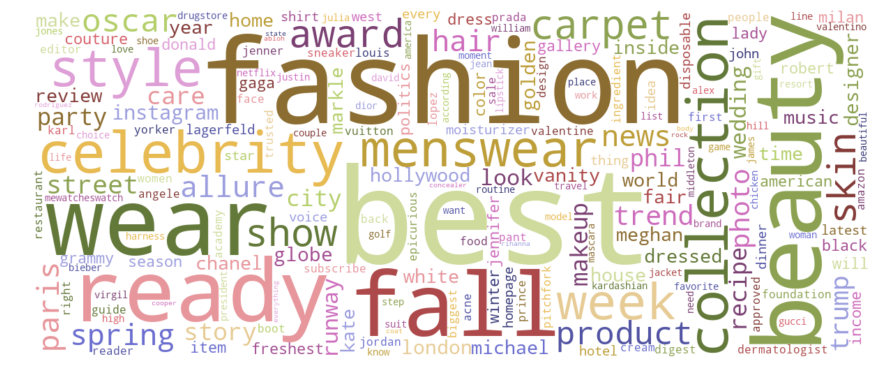

In [65]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_male.loc[model_male.bucket == 1]['text'].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury male bucket 1.png')

### 3.3.3 luxury handbags 
#### word cloud

[('best', 46292), ('fashion', 23270), ('wear', 21721), ('ready', 20889), ('beauty', 18354), ('fall', 18017), ('collection', 17354), ('skin', 13376), ('carpet', 12698), ('hair', 12540), ('allure', 11503), ('paris', 10303), ('recipes', 9629), ('celebrity', 9407), ('style', 8939), ('wedding', 8894), ('spring', 8621), ('week', 8368), ('oscars', 8332), ('trump', 8192)]


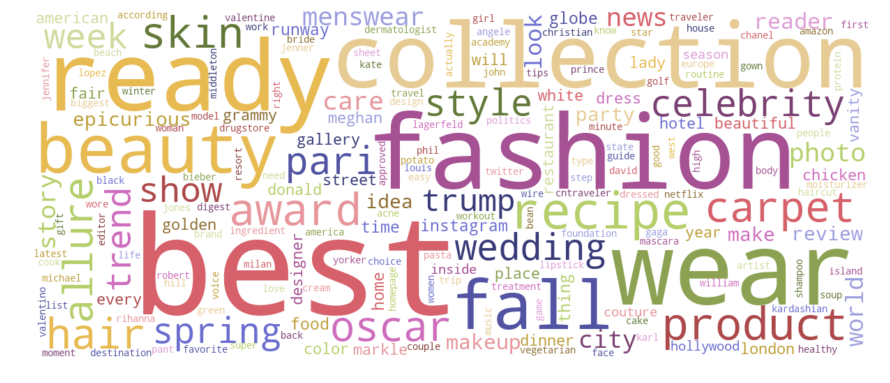

In [66]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_handbags["text"].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury handbags.png')

#### bucket 1 word cloud

[('best', 27648), ('wear', 17852), ('fashion', 17476), ('ready', 17354), ('fall', 14881), ('beauty', 14522), ('collection', 13858), ('skin', 10131), ('allure', 8739), ('carpet', 8690), ('hair', 8310), ('celebrity', 6900), ('paris', 6598), ('week', 6332), ('style', 6249), ('oscars', 6216), ('product', 6179), ('care', 6114), ('spring', 6089), ('menswear', 6058)]


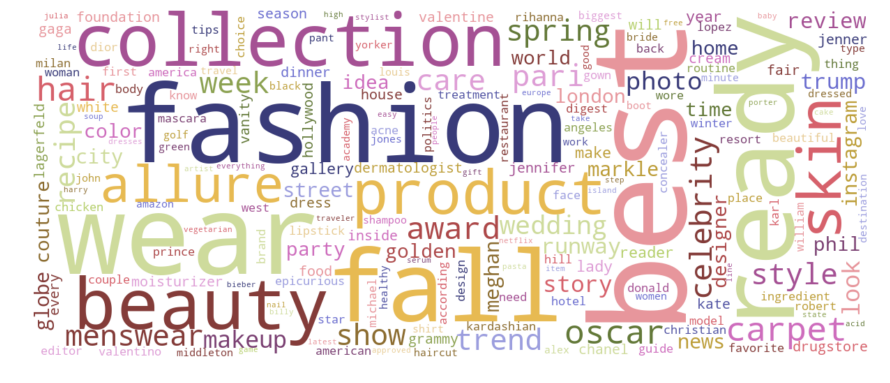

In [67]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_handbags.loc[model_handbags.bucket == 1]['text'].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury handbags bucket 1.png')

### 3.3.4 luxury accensories 
#### word cloud

[('best', 43169), ('fashion', 18824), ('beauty', 15400), ('skin', 13000), ('carpet', 11846), ('wear', 11604), ('hair', 11518), ('ready', 10605), ('collection', 10272), ('fall', 9962), ('allure', 9915), ('spring', 9699), ('wedding', 9071), ('news', 8627), ('style', 8464), ('menswear', 8217), ('week', 8116), ('recipes', 8073), ('celebrity', 7772), ('care', 7667)]


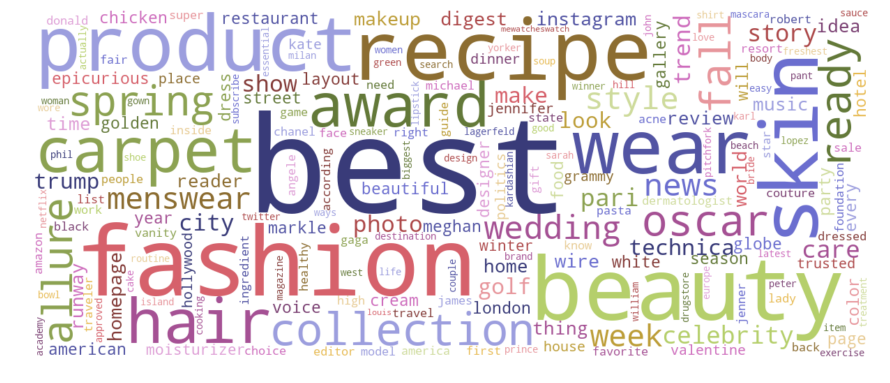

In [68]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_accensories["text"].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury accensories.png')

#### bucket 1 word cloud

[('best', 27963), ('fashion', 15630), ('beauty', 13015), ('skin', 10240), ('wear', 9419), ('carpet', 9125), ('ready', 8661), ('fall', 8172), ('hair', 8158), ('collection', 8013), ('spring', 7879), ('allure', 7490), ('style', 6807), ('week', 6708), ('menswear', 6642), ('celebrity', 6449), ('care', 6023), ('product', 5934), ('paris', 5331), ('oscars', 5316)]


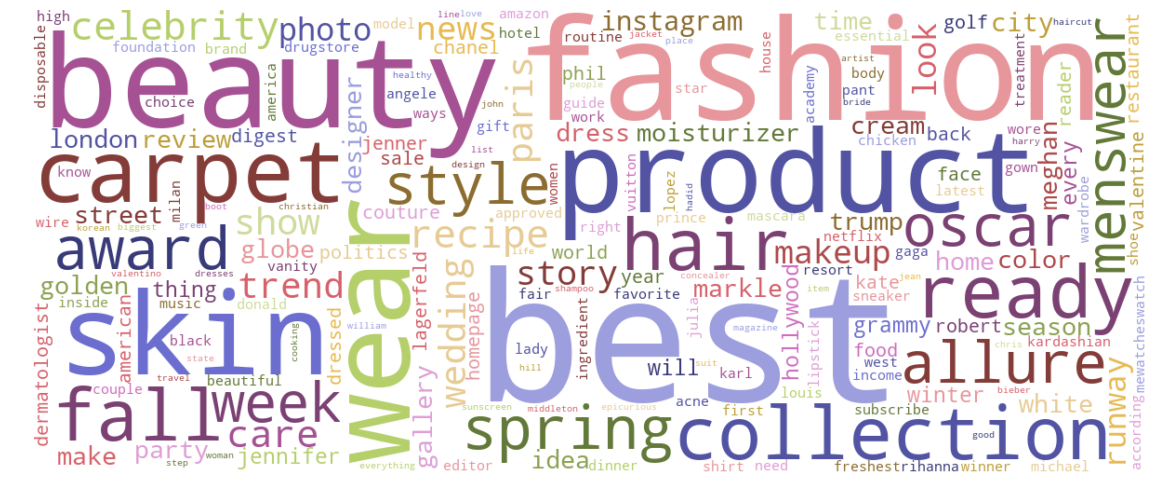

In [69]:
stopwords = set(STOPWORDS)
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_accensories.loc[model_accensories.bucket == 1]['text'].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury accensories bucket 1.png')

### 3.3.5 luxury jewelry 
#### word cloud

[('best', 37865), ('fashion', 17370), ('beauty', 16141), ('skin', 13228), ('wedding', 12146), ('recipes', 11843), ('wear', 11541), ('hair', 11274), ('ready', 10967), ('allure', 10691), ('collection', 9989), ('fall', 9847), ('celebrity', 8134), ('carpet', 8085), ('spring', 7801), ('care', 7769), ('epicurious', 7618), ('product', 7479), ('style', 6781), ('paris', 6674)]


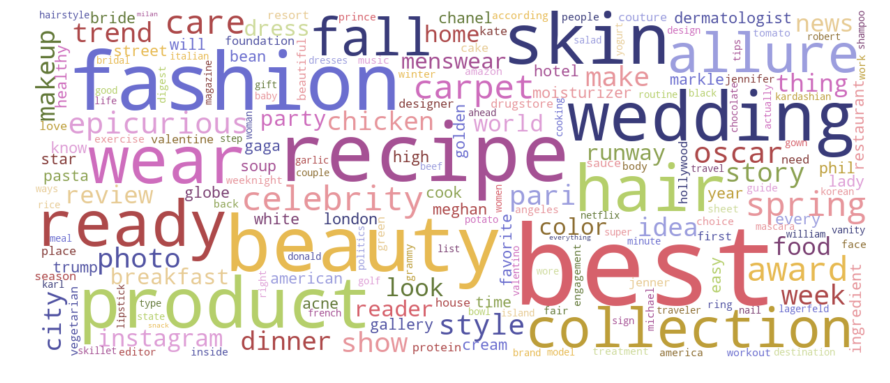

In [70]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_jewelry["text"].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury jewelry.png')

#### bucket 1 word cloud

[('best', 23516), ('beauty', 11982), ('skin', 10215), ('fashion', 9731), ('allure', 8712), ('wedding', 8442), ('hair', 8181), ('care', 6123), ('product', 5728), ('recipes', 5383), ('celebrity', 4641), ('fall', 4474), ('wear', 4441), ('products', 4397), ('makeup', 4292), ('ready', 4049), ('style', 4022), ('collection', 3945), ('spring', 3919), ('paris', 3684)]


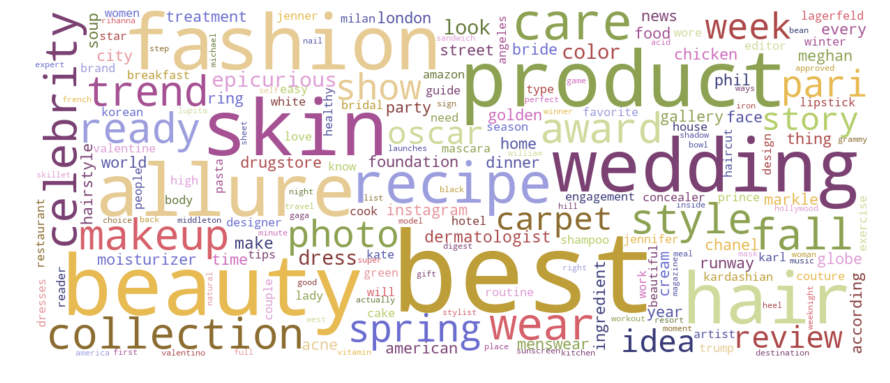

In [71]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('cond')
stopwords.add('nast')
stopwords.add('york')
stopwords.add('vogue')
#tokenize title
txt_words = model_jewelry.loc[model_jewelry.bucket == 1]['text'].apply(lambda x: x.split())
#remove stopwords
txt_words = txt_words.apply(lambda x: [item for item in x if item not in stopwords])
#detokenization
txt_words = [x for y in txt_words for x in y]
print(Counter(txt_words).most_common(20))
wc = wordcloud.WordCloud(stopwords = stopwords, width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(txt_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('luxury jewelry bucket 1.png')